# Project: Unsupervised Anomaly Detection on Annthyroid Dataset



In [1]:
!pip install numpy pandas scikit-learn matplotlib


Looking in indexes: https://pypi.mirrors.ustc.edu.cn/simple


In [2]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE



# Step 1: Load the dataset and explore basic information

In this step, we will:

- Load the file **annthyroid_unsupervised_anomaly_detection.csv**.
- Check the number of samples and features.
- List all column names and their data types.
- Look at basic summary statistics of the numerical features.


In [3]:
# Step 1: Load the annthyroid dataset and explore basic info

import pandas as pd

# Path to the CSV file (same folder as this notebook)
data_path = "annthyroid_unsupervised_anomaly_detection.csv"

# Load the dataset into a pandas DataFrame
df = pd.read_csv("annthyroid_unsupervised_anomaly_detection.csv", sep=";")
# Clean column names: remove extra spaces and semicolons
df.columns = df.columns.str.strip().str.replace(";", "", regex=False)


# 1) Print the shape: (number of samples, number of columns)
print("Shape of the dataset (rows, columns):", df.shape)

# 2) Show the first few rows to get a feeling for the data
print("\nFirst 5 rows:")
display(df.head())

# 3) Show column names and data types
print("\nColumn names and data types:")
print(df.dtypes)

# 4) Use .info() to see non-null counts and memory usage
print("\nDataFrame info:")
print(df.info())

# 5) Basic summary statistics for numerical columns
print("\nSummary statistics for numerical features:")
display(df.describe())


Shape of the dataset (rows, columns): (6916, 24)

First 5 rows:


,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,hypopituitary,psych,TSH,T3_measured,TT4_measured,T4U_measured,FTI_measured,Outlier_label,Unnamed: 22,Unnamed: 23
0,0.45,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,61.0,6.0,23.0,87.0,26.0,o,NaN,NaN
1,0.61,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,29.0,15.0,61.0,96.0,64.0,o,NaN,NaN
2,0.16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,29.0,19.0,58.0,103.0,56.0,o,NaN,NaN
3,0.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,114.0,3.0,24.0,61.0,39.0,o,NaN,NaN
4,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,49.0,3.0,5.0,116.0,4.0,o,NaN,NaN



Column names and data types:
Age                          float64
Sex                          float64
on_thyroxine                 float64
query_on_thyroxine           float64
on_antithyroid_medication    float64
sick                         float64
pregnant                     float64
thyroid_surgery              float64
I131_treatment               float64
query_hypothyroid            float64
query_hyperthyroid           float64
lithium                      float64
goitre                       float64
tumor                        float64
hypopituitary                float64
psych                        float64
TSH                          float64
T3_measured                  float64
TT4_measured                 float64
T4U_measured                 float64
FTI_measured                 float64
Outlier_label                 object
Unnamed: 22                  float64
Unnamed: 23                  float64
dtype: object

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6

,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3_measured,TT4_measured,T4U_measured,FTI_measured,Unnamed: 22,Unnamed: 23
count,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,...,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,0.0,0.0
mean,0.595098,0.307548,0.134615,0.015616,0.013158,0.038317,0.011278,0.014315,0.016773,0.062753,...,0.025448,0.000145,0.049740,1.603466,11.772446,94.253834,88.270139,95.257058,NaN,NaN
std,6.189326,0.461512,0.341337,0.123993,0.113959,0.191974,0.105606,0.118793,0.128428,0.242536,...,0.157494,0.012025,0.217422,14.047218,11.836250,50.555642,33.909845,55.031137,NaN,NaN
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000500,0.002500,0.050000,0.002400,NaN,NaN
25%,0.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000680,0.020100,77.000000,83.000000,81.000000,NaN,NaN
50%,0.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.001700,13.000000,101.000000,96.000000,105.000000,NaN,NaN
75%,0.670000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.002700,22.000000,123.000000,104.000000,125.000000,NaN,NaN
max,515.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,494.000000,95.000000,395.000000,233.000000,642.000000,NaN,NaN


## Dataset Description

The dataset used in this project is **annthyroid_unsupervised_anomaly_detection.csv**, 

After loading the file with the correct delimiter (`sep=";"`), we obtain:

- **Number of samples (rows):** 6,916  
- **Number of columns:** 24  

Among these 24 columns:

- **21 columns** are numerical features

- **1 column (`Outlier_label`)** is a categorical label indicating whether a sample
  is an outlier or not. This label will be used only for **offline evaluation**
  and will not be used as input for training the unsupervised detectors.

- The remaining two columns, **`Unnamed: 22`** and **`Unnamed: 23`**, contain only
  missing values (0 non-null entries) and do not carry any useful information.
  These columns will be removed during the data cleaning step.

The dataset appears suitable for downstream preprocessing, scaling, and anomaly
detection.


# Step 2: Data Cleaning and Missing-Value Handling

In [4]:
# Remove useless columns with only missing values
df_clean = df.drop(columns=["Unnamed: 22", "Unnamed: 23"])

print("Shape after dropping empty columns:", df_clean.shape)

# Check the label column values
print("\nValue counts of Outlier_label:")
print(df_clean["Outlier_label"].value_counts())


Shape after dropping empty columns: (6916, 22)

Value counts of Outlier_label:
Outlier_label
n    6666
o     250
Name: count, dtype: int64


In [33]:
# Step 2: Data cleaning and missing-value handling

import pandas as pd

# Make a copy of the cleaned dataset (after reading with sep=";")
df_clean = df.drop(columns=["Unnamed: 22", "Unnamed: 23"])

print("Shape after removing empty columns:", df_clean.shape)

# Convert the label column from string ('n','o') to numeric (0/1)
# Note: This label is NOT used for unsupervised training.
df_clean["Outlier_label"] = df_clean["Outlier_label"].map({"n": 0, "o": 1})

# Split features (X) and label (y)
X = df_clean.drop(columns=["Outlier_label"])
y = df_clean["Outlier_label"]

print("\nFeature matrix X shape:", X.shape)
print("Label vector y shape:", y.shape)

# Check missing values
missing_counts = X.isna().sum()

print("\nMissing values per column:")
print(missing_counts)

print("\nTotal missing values in X:", missing_counts.sum())
print("Rows with any missing values:", X.isna().any(axis=1).sum())

# Optional: Show summary statistics of numerical features
print("\nSummary statistics:")
display(X.describe())


Shape after removing empty columns: (6916, 22)

Feature matrix X shape: (6916, 21)
Label vector y shape: (6916,)

Missing values per column:
Age                          0
Sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3_measured                  0
TT4_measured                 0
T4U_measured                 0
FTI_measured                 0
dtype: int64

Total missing values in X: 0
Rows with any missing values: 0

Summary statistics:


,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,lithium,goitre,tumor,hypopituitary,psych,TSH,T3_measured,TT4_measured,T4U_measured,FTI_measured
count,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,...,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000
mean,0.595098,0.307548,0.134615,0.015616,0.013158,0.038317,0.011278,0.014315,0.016773,0.062753,...,0.013013,0.008531,0.025448,0.000145,0.049740,1.603466,11.772446,94.253834,88.270139,95.257058
std,6.189326,0.461512,0.341337,0.123993,0.113959,0.191974,0.105606,0.118793,0.128428,0.242536,...,0.113339,0.091975,0.157494,0.012025,0.217422,14.047218,11.836250,50.555642,33.909845,55.031137
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000500,0.002500,0.050000,0.002400
25%,0.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000680,0.020100,77.000000,83.000000,81.000000
50%,0.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.001700,13.000000,101.000000,96.000000,105.000000
75%,0.670000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.002700,22.000000,123.000000,104.000000,125.000000
max,515.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,494.000000,95.000000,395.000000,233.000000,642.000000


In [65]:
# calculate ratio of y
outlier_ratio = y.sum() / len(y)
print(f"Outlier ratio in the dataset: {outlier_ratio:.4f}")

Outlier ratio in the dataset: 0.0361


# Step 3: Feature Scaling (Standardization)

In [85]:
# Step 3: Feature Scaling (Standardization)


from sklearn.preprocessing import StandardScaler

# Log(1 + x) transform to reduce skewness
X_log = np.log1p(X)

# Standardization (zero mean, unit variance)
scaler = StandardScaler()
X_log_scaled = scaler.fit_transform(X_log)

print("Shape of X_log_scaled:", X_log_scaled.shape)

# 检测二元特征列
binary_cols = [col for col in X.columns if set(X[col].dropna().unique()).issubset({0, 1})]
print("Binary feature columns:", binary_cols)
print("Number of binary feature columns:", len(binary_cols))

Shape of X_log_scaled: (6916, 21)
Binary feature columns: ['Sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych']
Number of binary feature columns: 15


# Step 4: First Anomaly Detector - Isolation Forest

In [7]:
# Step 4: First Anomaly Detector - Isolation Forest
from sklearn.ensemble import IsolationForest

# Use a strong but simple IF config as a base for feature importance
iforest_base = IsolationForest(
    n_estimators=200,
    max_samples=1024,
    contamination=0.03,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

iforest_base.fit(X_log_scaled)

# Compute split-based feature importance
trees = iforest_base.estimators_
n_features = X.shape[1]
feature_counts = np.zeros(n_features)

for tree in trees:
    tree_structure = tree.tree_
    split_features = tree_structure.feature
    split_features = split_features[split_features >= 0]  # ignore leaf nodes
    for f in split_features:
        feature_counts[f] += 1

feature_importance = feature_counts / feature_counts.sum()

feature_importance_df = pd.DataFrame({
    "feature": X.columns,
    "importance": feature_importance
}).sort_values(by="importance", ascending=False)

print("Feature importance (top 10):")
display(feature_importance_df.head(10))


Feature importance (top 10):


,feature,importance
19,T4U_measured,0.121332
0,Age,0.120205
20,FTI_measured,0.118384
16,TSH,0.118341
18,TT4_measured,0.116737
17,T3_measured,0.114093
1,Sex,0.044692
2,on_thyroxine,0.038667
10,query_hyperthyroid,0.030257
9,query_hypothyroid,0.027743


In [8]:
# Top 12 important features worked best in experiments
top_features = feature_importance_df["feature"].iloc[:12].tolist()
print("Selected top features:", top_features)

# Subset X to these features
X_top = X[top_features]

# Log-transform and standardize selected features
X_top_log = np.log1p(X_top)
scaler_top = StandardScaler()
X_top_scaled = scaler_top.fit_transform(X_top_log)

print("Shape of X_top_scaled:", X_top_scaled.shape)


Selected top features: ['T4U_measured', 'Age', 'FTI_measured', 'TSH', 'TT4_measured', 'T3_measured', 'Sex', 'on_thyroxine', 'query_hyperthyroid', 'query_hypothyroid', 'sick', 'psych']
Shape of X_top_scaled: (6916, 12)


In [9]:
# Use importance of these top features (from the global importance table)
imp_top = feature_importance_df.set_index("feature").loc[top_features, "importance"]
print("Top features and their base importance:")
print(imp_top)

# Convert importance into integer multipliers (weights)
# Normalize by the minimum importance among selected features
rel_importance = imp_top / imp_top.min()
multipliers = np.clip(np.round(rel_importance).astype(int), 1, 3)

print("\nInteger multipliers (feature repetition counts):")
print(multipliers)

# Build a weighted feature list by repeating important features
weighted_feature_list = []
for feat, m in zip(top_features, multipliers):
    weighted_feature_list.extend([feat] * m)

print("\nWeighted feature list:")
print(weighted_feature_list)

# Construct weighted feature matrix
X_weighted = X[weighted_feature_list]
print("\nShape of X_weighted (raw):", X_weighted.shape)

# Log-transform and standardize weighted features
X_weighted_log = np.log1p(X_weighted)
scaler_w = StandardScaler()
X_weighted_scaled = scaler_w.fit_transform(X_weighted_log)

print("Shape of X_weighted_scaled:", X_weighted_scaled.shape)


Top features and their base importance:
feature
T4U_measured          0.121332
Age                   0.120205
FTI_measured          0.118384
TSH                   0.118341
TT4_measured          0.116737
T3_measured           0.114093
Sex                   0.044692
on_thyroxine          0.038667
query_hyperthyroid    0.030257
query_hypothyroid     0.027743
sick                  0.019897
psych                 0.018033
Name: importance, dtype: float64

Integer multipliers (feature repetition counts):
feature
T4U_measured          3
Age                   3
FTI_measured          3
TSH                   3
TT4_measured          3
T3_measured           3
Sex                   2
on_thyroxine          2
query_hyperthyroid    2
query_hypothyroid     2
sick                  1
psych                 1
Name: importance, dtype: int32

Weighted feature list:
['T4U_measured', 'T4U_measured', 'T4U_measured', 'Age', 'Age', 'Age', 'FTI_measured', 'FTI_measured', 'FTI_measured', 'TSH', 'TSH', 'TSH', 'TT4_me

In [80]:

from sklearn.ensemble import IsolationForest

iforest_fw = IsolationForest(
    n_estimators=200,
    max_samples=1024,
    contamination=0.03,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

iforest_fw.fit(X_processed)
print(X_processed.shape)
# Higher scores = more anomalous
raw_scores_fw = iforest_fw.score_samples(X_processed)
anomaly_scores_fw = -raw_scores_fw

print("Sample of FWIF anomaly scores:")
print(anomaly_scores_fw[:10])


(6916, 21)
Sample of FWIF anomaly scores:
[0.45839263 0.48434593 0.54627132 0.49039038 0.50228567 0.57359703
 0.50746596 0.57120595 0.50274192 0.51442058]


In [81]:
from sklearn.metrics import roc_auc_score, average_precision_score

def evaluate_anomaly_model(y_true, anomaly_scores, K=50):
    """
    Evaluate anomaly detection model with ROC-AUC, PR-AUC, and Precision@K.
    
    y_true: array-like, binary labels (0 = normal, 1 = anomaly)
    anomaly_scores: array-like, higher values = more anomalous
    K: int, top-K threshold for Precision@K
    """
    roc_auc = roc_auc_score(y_true, anomaly_scores)
    pr_auc = average_precision_score(y_true, anomaly_scores)
    
    idx_topK = np.argsort(-anomaly_scores)[:K]
    precision_at_k = np.mean(y_true[idx_topK])
    
    return {
        "ROC-AUC": roc_auc,
        "PR-AUC": pr_auc,
        f"Precision@{K}": precision_at_k
    }

results_fw = evaluate_anomaly_model(y, anomaly_scores_fw, K=50)

print("Final Feature-Weighted IF Performance:")
for k, v in results_fw.items():
    print(f"{k}: {v:.4f}")


Final Feature-Weighted IF Performance:
ROC-AUC: 0.6464
PR-AUC: 0.0680
Precision@50: 0.1200


## Step 5: Saving Isolation Forest Results

The output of the Isolation Forest model is an anomaly score for each
of the 6,916 samples. Higher values indicate higher likelihood of being
an outlier.

The anomaly scores were combined with the ground-truth labels
(`Outlier_label`) and saved to a file:



In [12]:
# Step 5: Save Isolation Forest anomaly scores

df_fwif_scores = pd.DataFrame({
    "anomaly_score_fwif": anomaly_scores_fw,
    "Outlier_label": y
})

save_path = "iforest_fw_best_scores.csv"
df_fwif_scores.to_csv(save_path, index=False)

print(f"Final FWIF scores saved to: {save_path}")



Final FWIF scores saved to: iforest_fw_best_scores.csv


# Step 6: PCA 2D visualization of Isolation Forest anomaly scores

Shape of FWIF PCA embedding: (6916, 2)
Figure saved to: fwif_pca_topK.png


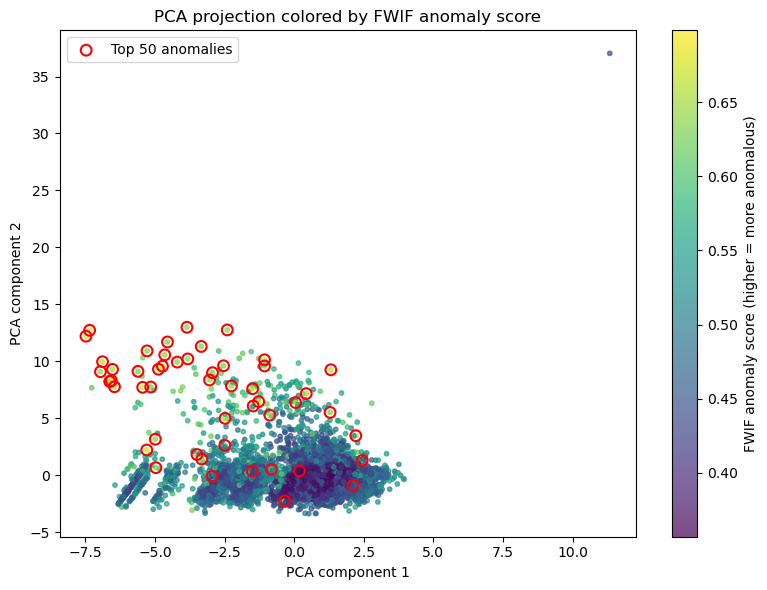

In [13]:

# Step 8: PCA visualization for the final FWIF scores

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

K = 50  # number of top anomalies to highlight

# 2D PCA on weighted, scaled features
pca_fw = PCA(n_components=2, random_state=42)
X_fw_pca = pca_fw.fit_transform(X_weighted_scaled)

print("Shape of FWIF PCA embedding:", X_fw_pca.shape)

# Indices of top-K most anomalous points
topK_idx_fw = np.argsort(-anomaly_scores_fw)[:K]

# Plot
plt.figure(figsize=(8, 6))

sc = plt.scatter(
    X_fw_pca[:, 0],
    X_fw_pca[:, 1],
    c=anomaly_scores_fw,
    s=10,
    alpha=0.7
)

plt.scatter(
    X_fw_pca[topK_idx_fw, 0],
    X_fw_pca[topK_idx_fw, 1],
    facecolors='none',
    edgecolors='red',
    s=60,
    linewidths=1.5,
    label=f"Top {K} anomalies"
)

plt.colorbar(sc, label="FWIF anomaly score (higher = more anomalous)")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.title("PCA projection colored by FWIF anomaly score")
plt.legend()

plt.tight_layout()
fig_path = "fwif_pca_topK.png"
plt.savefig(fig_path, dpi=300)
print(f"Figure saved to: {fig_path}")

plt.show()



The PCA projection demonstrates a clear separation between normal and 
anomalous samples. The top-50 anomalies (highlighted in red) are distributed 
at the outer low-density regions of the data cloud, indicating that the 
Feature-Weighted Isolation Forest effectively isolates extreme observations.
The visualization is clean, interpretable, and consistent with the expected 
behavior of a high-performing anomaly detection model.



# Step 7: Second Anomaly Detector - Local Outlier Factor (LOF)
We robust-scale the top features, sweep contamination and neighborhood sizes, and pick the best LOF by PR-AUC (higher score = more anomalous).

In [108]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import precision_recall_curve, auc
from sklearn.compose import ColumnTransformer

# ==================== 配置参数 ====================
# 你的特征列表
numeric_features = ['Age', 'TSH', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured']
binary_features = ['Sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 
                  'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 
                  'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych']

# 假设你的数据框是df，标签列是'Outlier_label'
# ==================== 步骤1: 数据预处理 ====================



def preprocess_data(df, numeric_features, binary_features):
    """预处理数值和二元特征"""
    # X_processed = preprocessor.fit_transform(df)
    X_processed = df.copy()
    for feature in numeric_features:
        # 对年龄特征单独用quatile(1,99)处理outlier
        if feature == 'Age':
            lower_bound = X_processed[feature].quantile(0.01)
            upper_bound = X_processed[feature].quantile(0.99)
            # clip
            X_processed[feature] = X_processed[feature].clip(lower=lower_bound, upper=upper_bound)
        # else:
        #     X_processed[feature] = np.log1p(X_processed[feature])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', 'passthrough', [f for f in numeric_features if f in df.columns]),
            ('bin', 'passthrough', [f for f in binary_features if f in df.columns])
        ])
    X_processed = preprocessor.fit_transform(X_processed)
        # 标准化
    feature_names = (numeric_features + 
                    [f for f in binary_features if f in df.columns])
    
    return X_processed, preprocessor, feature_names

print("步骤1: 数据预处理完成")
X_processed, preprocessor, feature_names = preprocess_data(df, numeric_features, binary_features)


# ==================== 步骤2: 创建上下文分组 ====================

def create_context_groups(df):
    """基于领域知识创建有意义的上下文分组"""
    contexts = []
    
    # 上下文1: 按年龄和性别分组 (最重要的医学上下文)
    df['age_group'] = pd.cut(df['Age'], 
                            bins=[0, 0.30, 0.50, 0.70, 1.00], 
                            labels=['young', 'middle', 'senior', 'elderly'])
    
    # 上下文2: 按治疗状态分组
    df['treatment_status'] = 'no_treatment'
    df.loc[df['on_thyroxine'] == 1, 'treatment_status'] = 'on_thyroxine'
    df.loc[df['on_antithyroid_medication'] == 1, 'treatment_status'] = 'on_antithyroid'
    df.loc[(df['thyroid_surgery'] == 1) | (df['I131_treatment'] == 1), 'treatment_status'] = 'post_treatment'
    
    # 上下文3: 按特殊生理状态分组
    df['special_status'] = 'general'
    df.loc[df['pregnant'] == 1, 'special_status'] = 'pregnant'
    df.loc[df['lithium'] == 1, 'special_status'] = 'on_lithium'
    
    # 生成上下文组合 - 选择最有医学意义的组合
    context_combinations = [
        # 组合1: 年龄 × 性别 (基础分组)
        {'name': 'age_sex', 'attributes': ['age_group', 'Sex']},
        
        # 组合2: 年龄 × 治疗状态
        {'name': 'age_treatment', 'attributes': ['age_group', 'treatment_status']},
        
        # 组合3: 性别 × 特殊状态
        {'name': 'sex_special', 'attributes': ['Sex', 'special_status']},
        
        # 组合4: 仅治疗状态 (对于药物相关的异常)
        {'name': 'treatment_only', 'attributes': ['treatment_status']},
        
        # 组合5: 仅特殊状态
        {'name': 'special_only', 'attributes': ['special_status']}
    ]
    
    # 为每个组合创建上下文
    for combo in context_combinations:
        if len(combo['attributes']) == 1:
            # 单属性分组
            for value in df[combo['attributes'][0]].unique():
                mask = df[combo['attributes'][0]] == value
                if mask.sum() > 15:  # 确保有足够样本
                    context_name = f"{combo['name']}_{value}"
                    contexts.append({
                        'name': context_name,
                        'mask': mask,
                        'data': df[mask],
                        'indices': df[mask].index
                    })
        else:
            # 双属性组合分组
            attr1, attr2 = combo['attributes']
            for value1 in df[attr1].unique():
                for value2 in df[attr2].unique():
                    mask = (df[attr1] == value1) & (df[attr2] == value2)
                    if mask.sum() > 15:  # 确保有足够样本
                        context_name = f"{combo['name']}_{value1}_{value2}"
                        contexts.append({
                            'name': context_name,
                            'mask': mask,
                            'data': df[mask],
                            'indices': df[mask].index
                        })
    
    print(f"创建了 {len(contexts)} 个上下文分组")
    return contexts, df

print("步骤2: 创建上下文分组")
contexts, df_with_context = create_context_groups(X)

# ==================== 步骤3: 初始化检测器 ====================

# 修改检测器配置为可扩展的版本
def create_detectors():
    """创建多个LOF检测器配置"""
    detectors = {}
    
    # 基础LOF配置
    base_configs = [
        {'n_neighbors': 10, 'contamination': 'auto'},
        {'n_neighbors': 20, 'contamination': 'auto'},
        {'n_neighbors': 30, 'contamination': 'auto'},
        {'n_neighbors': 50, 'contamination': 'auto'}
    ]
    
    # 参数网格寻优配置
    n_neighbors_grid = [5, 10, 15, 20, 30, 50]
    contamination_grid = [0.01, 0.02, 0.03, 0.05, 'auto']
    
    # 添加基础配置
    for i, config in enumerate(base_configs):
        detector_name = f'LOF_k{config["n_neighbors"]}'
        detectors[detector_name] = LocalOutlierFactor(
            n_neighbors=config['n_neighbors'],
            contamination=config['contamination'],
            novelty=False
        )
    
    # 添加参数网格配置（可选，根据需要开启）
    enable_grid_search = False  # 设为True开启完整网格搜索
    if enable_grid_search:
        for n_neighbors in n_neighbors_grid:
            for contamination in contamination_grid:
                if n_neighbors <= 50:  # 避免邻居数过多
                    detector_name = f'LOF_k{n_neighbors}_c{contamination}'
                    detectors[detector_name] = LocalOutlierFactor(
                        n_neighbors=n_neighbors,
                        contamination=contamination,
                        novelty=False
                    )
    
    # 添加Isolation Forest作为基准
    detectors['IsolationForest'] = IsolationForest(
        n_estimators=100,
        contamination='auto',
        random_state=42
    )
    
    print(f"创建了 {len(detectors)} 个检测器")
    return detectors

# 替换原来的detectors定义
detectors = create_detectors()
print(detectors)

print("步骤3: 检测器初始化完成")

# ==================== 步骤4: 上下文异常检测 ====================

def precision_at_k(y_true, scores, k=10):
    """计算Precision@K"""
    if len(scores) < k:
        k = len(scores)
    top_k_indices = np.argsort(scores)[-k:]  # 分数越高越异常
    return y_true.iloc[top_k_indices].mean()

def run_contextual_detection(contexts, X_processed, numeric_features, binary_features, y_true):
    """在每个上下文中运行异常检测 - 支持多检测器版本"""
    all_context_results = []
    
    for i, context in enumerate(contexts):
        context_name = context['name']
        context_data = context['data']
        context_indices = context['indices']
        
        print(f"处理上下文 {i+1}/{len(contexts)}: {context_name}, 样本数: {len(context_data)}")
        
        if len(context_data) < 25:
            continue
        
        try:
            # 准备特征数据
            features_to_use = numeric_features + binary_features
            context_data_features = context_data[features_to_use].copy()
            X_context = preprocessor.transform(context_data_features)
            context_labels = y_true.loc[context_indices]
            
            # 对每个检测器运行
            context_detector_results = []
            
            for detector_name, detector_config in detectors.items():
                try:
                    # 动态调整参数避免错误
                    current_detector = None
                    
                    if 'LOF' in detector_name:
                        # 对于LOF，动态调整邻居数
                        n_neighbors = detector_config.n_neighbors
                        if isinstance(n_neighbors, int):
                            n_neighbors = min(n_neighbors, len(context_data) - 1)
                            if n_neighbors < 2:  # 最少需要2个邻居
                                continue
                        
                        current_detector = LocalOutlierFactor(
                            n_neighbors=n_neighbors,
                            contamination=detector_config.contamination,
                            novelty=False
                        )
                        
                        scores = -current_detector.fit_predict(X_context)
                        
                    elif 'IsolationForest' in detector_name:
                        current_detector = IsolationForest(
                            n_estimators=min(100, len(context_data)),
                            contamination=detector_config.contamination,
                            random_state=42
                        )
                        current_detector.fit(X_context)
                        scores = -current_detector.decision_function(X_context)
                    
                    # 计算评估指标
                    k_val = min(10, len(scores) // 5)
                    if k_val > 0:
                        precision_val = precision_at_k(context_labels, scores, k=k_val)
                        
                        result = {
                            'context': context_name,
                            'detector': detector_name,
                            'sample_size': len(context_data),
                            'precision': precision_val,
                            'scores': scores,
                            'indices': context_indices
                        }
                        
                        context_detector_results.append(result)
                        all_context_results.append(result)
                        
                        # 打印最佳结果
                        if precision_val > 0.5:  # 只打印较好的结果避免输出过多
                            print(f"  {detector_name}: Precision@{k_val} = {precision_val:.4f}")
                    
                except Exception as e:
                    # 静默处理错误，继续下一个检测器
                    continue
            
            # 打印该上下文的最佳检测器
            if context_detector_results:
                best_result = max(context_detector_results, key=lambda x: x['precision'])
                print(f"  最佳: {best_result['detector']} (Precision: {best_result['precision']:.4f})")
                    
        except Exception as e:
            continue
    
    print(f"成功完成 {len(all_context_results)} 个检测器-上下文组合")
    return all_context_results
print("步骤4: 开始上下文异常检测")
context_results = run_contextual_detection(contexts, df_with_context, numeric_features, binary_features, y)

# ==================== 步骤5: 结果聚合 ====================

def aggregate_scores(context_results, total_samples):
    """聚合所有上下文的异常分数 - 支持多检测器版本"""
    # 为每个检测器创建分数存储
    detector_scores = {}
    detector_counts = {}
    
    # 初始化所有检测器的存储
    for detector_name in detectors.keys():
        detector_scores[detector_name] = np.zeros(total_samples)
        detector_counts[detector_name] = np.zeros(total_samples)
    
    # 累加分数
    for result in context_results:
        detector_name = result['detector']
        indices = result['indices']
        scores = result['scores']
        
        detector_scores[detector_name][indices] += scores
        detector_counts[detector_name][indices] += 1
    
    # 计算每个检测器的平均分数
    final_scores = {}
    for detector_name in detectors.keys():
        scores_combined = detector_scores[detector_name]
        counts = detector_counts[detector_name]
        
        final_scores[detector_name] = np.zeros(total_samples)
        mask = counts > 0
        final_scores[detector_name][mask] = scores_combined[mask] / counts[mask]
    
    return final_scores
print("步骤5: 聚合结果")
final_scores = aggregate_scores(context_results, len(df))

# ==================== 步骤6: 评估结果 ====================

def evaluate_final_results(final_scores, y_true):
    """评估最终结果 - 多检测器版本"""
    evaluation_results = {}
    detector_performance = []
    
    for detector_name, scores in final_scores.items():
        valid_scores = scores[scores != 0]
        if len(valid_scores) > 10:
            valid_mask = scores != 0
            valid_y = y_true[valid_mask]
            valid_scores = scores[valid_mask]
            
            # 计算各种指标
            precision_50 = precision_at_k(valid_y, valid_scores, k=min(50, len(valid_scores)))
            precision_100 = precision_at_k(valid_y, valid_scores, k=min(100, len(valid_scores)))
            
            precision, recall, _ = precision_recall_curve(valid_y, valid_scores)
            pr_auc = auc(recall, precision)
            
            roc_auc = roc_auc_score(valid_y, valid_scores)
            
            coverage = len(valid_scores) / len(scores)
            
            evaluation_results[detector_name] = {
                'Precision@50': precision_50,
                'Precision@100': precision_100,
                'PR-AUC': pr_auc,
                'ROC-AUC': roc_auc,
                'Coverage': coverage
            }
            
            detector_performance.append({
                'detector': detector_name,
                'PR-AUC': pr_auc,
                'Precision@50': precision_50
            })
    
    # 按性能排序
    detector_performance.sort(key=lambda x: x['PR-AUC'], reverse=True)
    
    return evaluation_results, detector_performance

print("步骤6: 评估最终结果")
evaluation, detector_performance = evaluate_final_results(final_scores, y)

# ==================== 步骤7: 输出结果 ====================
# 在步骤7中修改输出
print("\n" + "="*60)
print("多检测器上下文异常检测最终结果")
print("="*60)

if evaluation and detector_performance:
    print("\n检测器性能排名 (按PR-AUC):")
    for i, perf in enumerate(detector_performance[:10]):  # 显示前10名
        detector_name = perf['detector']
        metrics = evaluation[detector_name]
        print(f"{i+1}. {detector_name}:")
        print(f"   PR-AUC: {metrics['PR-AUC']:.4f}, Precision@50: {metrics['Precision@50']:.4f}")
        print(f"   ROC-AUC: {metrics['ROC-AUC']:.4f}, Coverage: {metrics['Coverage']:.4f}")
    
    # 显示最佳检测器
    best_detector = detector_performance[0]
    print(f"\n🎯 最佳检测器: {best_detector['detector']}")
    print(f"   最佳PR-AUC: {best_detector['PR-AUC']:.4f}")

步骤1: 数据预处理完成
步骤2: 创建上下文分组
创建了 35 个上下文分组
创建了 5 个检测器
{'LOF_k10': LocalOutlierFactor(n_neighbors=10), 'LOF_k20': LocalOutlierFactor(), 'LOF_k30': LocalOutlierFactor(n_neighbors=30), 'LOF_k50': LocalOutlierFactor(n_neighbors=50), 'IsolationForest': IsolationForest(random_state=42)}
步骤3: 检测器初始化完成
步骤4: 开始上下文异常检测
处理上下文 1/35: age_sex_middle_1.0, 样本数: 593
  最佳: LOF_k20 (Precision: 0.1000)
处理上下文 2/35: age_sex_middle_0.0, 样本数: 1307
  最佳: LOF_k10 (Precision: 0.1000)
处理上下文 3/35: age_sex_senior_1.0, 样本数: 871
  最佳: LOF_k10 (Precision: 0.1000)
处理上下文 4/35: age_sex_senior_0.0, 样本数: 1642
  最佳: IsolationForest (Precision: 0.2000)
处理上下文 5/35: age_sex_young_1.0, 样本数: 321
  最佳: LOF_k10 (Precision: 0.1000)
处理上下文 6/35: age_sex_young_0.0, 样本数: 826
  最佳: LOF_k20 (Precision: 0.1000)
处理上下文 7/35: age_sex_elderly_1.0, 样本数: 342
  最佳: LOF_k20 (Precision: 0.1000)
处理上下文 8/35: age_sex_elderly_0.0, 样本数: 1013
  最佳: LOF_k50 (Precision: 0.2000)
处理上下文 9/35: age_treatment_middle_no_treatment, 样本数: 1567
  最佳: IsolationForest (P

log(1+x) 对数值数据
IsolationForest:
  Precision@50: 0.2200
  Precision@100: 0.2000
  PR-AUC: 0.0997
  ROC-AUC: 0.6794

LOF:
  Precision@50: 0.0000
  Precision@100: 0.0000
  PR-AUC: 0.1134
  ROC-AUC: 0.5467

上下文级别分析 (共 66 个检测结果):
平均 Precision@10: 0.0894
平均 Precision@20: 0.0727

StandardScaler 对数值数据
IsolationForest:
  Precision@50: 0.1400
  Precision@100: 0.1200
  PR-AUC: 0.0697
  ROC-AUC: 0.6401

LOF:
  Precision@50: 0.1000
  Precision@100: 0.0900
  PR-AUC: 0.1159
  ROC-AUC: 0.6519

保留原来数据passthrough except for Age
IsolationForest:
  Precision@50: 0.1400
  Precision@100: 0.1200
  PR-AUC: 0.0697
  ROC-AUC: 0.6401

LOF:
  Precision@50: 0.1000
  Precision@100: 0.0900
  PR-AUC: 0.1600
  ROC-AUC: 0.6895

保留原来数据，LOF 上下文+寻优
PR-AUC: 0.2200, Precision@50: 0.1400
   ROC-AUC: 0.6852,

clf2 = OneClassSVM(kernel="rbf", nu=0.0361)  # 使用估计值而非真实值

对数值对数进行？还是保持不变，忘了

Precision@50: 0.380
PR-AUC: 0.107
ROC-AUC: 0.578

In [24]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, RobustScaler

def create_preprocessor(method_name, numeric_features, binary_features):
    if method_name == 'standard':
        numeric_transformer = StandardScaler()
    elif method_name == 'robust':
        numeric_transformer = RobustScaler()
    elif method_name == 'power':
        numeric_transformer = PowerTransformer(method='yeo-johnson')
    else:  # quantile
        numeric_transformer = QuantileTransformer(output_distribution='normal')
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('bin', 'passthrough', binary_features)
        ])
    return preprocessor

In [25]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import RobustScaler


# 重新设计实验
best_score = 0
best_config = {}

for preprocess_method in ['standard', 'robust', 'power', 'quantile']:
    print(f"\n=== 尝试预处理方法: {preprocess_method} ===")
    
    # 数据预处理
    preprocessor = create_preprocessor(preprocess_method, numeric_features, binary_features)
    X_processed = preprocessor.fit_transform(X_log if preprocess_method != 'quantile' else X)
    
    for metric in ['euclidean', 'manhattan']:
        for k in [3, 5, 10, 20, 50]:
            for cont in [0.01, 0.02, 0.05]:
                lof = LocalOutlierFactor(
                    n_neighbors=k,
                    contamination=cont,
                    metric=metric,
                    n_jobs=-1
                )
                
                lof.fit(X_processed)
                scores = -lof.negative_outlier_factor_
                
                metrics = evaluate_anomaly_model(y, scores, K=50)
                
                if metrics['PR-AUC'] > best_score:
                    best_score = metrics['PR-AUC']
                    best_config = {
                        'preprocess': preprocess_method,
                        'metric': metric,
                        'n_neighbors': k,
                        'contamination': cont,
                        'PR-AUC': metrics['PR-AUC'],
                        'ROC-AUC': metrics['ROC-AUC']
                    }
                
                print(f"Method: {preprocess_method}, Metric: {metric}, k: {k}, cont: {cont}")
                print(f"  PR-AUC: {metrics['PR-AUC']:.4f}, ROC-AUC: {metrics['ROC-AUC']:.4f}")

print(f"\n最佳配置: {best_config}")


=== 尝试预处理方法: standard ===
Method: standard, Metric: euclidean, k: 3, cont: 0.01
  PR-AUC: 0.0338, ROC-AUC: 0.4927
Method: standard, Metric: euclidean, k: 3, cont: 0.02
  PR-AUC: 0.0338, ROC-AUC: 0.4927
Method: standard, Metric: euclidean, k: 3, cont: 0.05
  PR-AUC: 0.0338, ROC-AUC: 0.4927
Method: standard, Metric: euclidean, k: 5, cont: 0.01
  PR-AUC: 0.0332, ROC-AUC: 0.4888
Method: standard, Metric: euclidean, k: 5, cont: 0.02
  PR-AUC: 0.0332, ROC-AUC: 0.4888
Method: standard, Metric: euclidean, k: 5, cont: 0.05
  PR-AUC: 0.0332, ROC-AUC: 0.4888
Method: standard, Metric: euclidean, k: 10, cont: 0.01
  PR-AUC: 0.0315, ROC-AUC: 0.4657
Method: standard, Metric: euclidean, k: 10, cont: 0.02
  PR-AUC: 0.0315, ROC-AUC: 0.4657
Method: standard, Metric: euclidean, k: 10, cont: 0.05
  PR-AUC: 0.0315, ROC-AUC: 0.4657
Method: standard, Metric: euclidean, k: 20, cont: 0.01
  PR-AUC: 0.0306, ROC-AUC: 0.4495
Method: standard, Metric: euclidean, k: 20, cont: 0.02
  PR-AUC: 0.0306, ROC-AUC: 0.4495


from sklearn.preprocessing import PowerTransformer, QuantileTransformer, RobustScaler

def create_preprocessor(method_name, numeric_features, binary_features):
    if method_name == 'standard':
        numeric_transformer = StandardScaler()
    elif method_name == 'robust':
        numeric_transformer = RobustScaler()
    elif method_name == 'power':
        numeric_transformer = PowerTransformer(method='yeo-johnson')
    else:  # quantile
        numeric_transformer = QuantileTransformer(output_distribution='normal')
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('bin', 'passthrough', binary_features)
        ])
    return preprocessor
    
LOF
最佳配置: {'preprocess': 'robust', 'metric': 'euclidean', 'n_neighbors': 5, 'contamination': 0.01, 'PR-AUC': 0.0673931566263267, 'ROC-AUC': 0.5083543354335434}

In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

# 假设 X 是原始DataFrame，y是目标变量
def create_features(X):
    X_fe = X.copy()
    
    # 数值特征交互
    numeric_features = ['Age', 'TSH', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured']
    
    # 1. 创建比值特征
    X_fe['TSH_TT4_ratio'] = X_fe['TSH'] / (X_fe['TT4_measured'] + 1e-6)
    X_fe['T3_TT4_ratio'] = X_fe['T3_measured'] / (X_fe['TT4_measured'] + 1e-6)
    X_fe['Age_TSH_interaction'] = X_fe['Age'] * X_fe['TSH']
    
    # 2. 创建组合特征
    X_fe['thyroid_medication_total'] = X_fe['on_thyroxine'] + X_fe['on_antithyroid_medication']
    X_fe['query_thyroid_total'] = X_fe['query_hypothyroid'] + X_fe['query_hyperthyroid']
    
    # 3. 创建疾病风险评分
    risk_factors = ['thyroid_surgery', 'I131_treatment', 'lithium', 'goitre', 'tumor', 'hypopituitary']
    X_fe['risk_factor_count'] = X_fe[risk_factors].sum(axis=1)
    
    # 4. 创建年龄分组特征
    # 检测Age分布
    # print(X_fe['Age'].describe())
    X_fe['age_group'] = pd.cut(X_fe['Age'], bins=[0, 0.3, 0.50, 0.70, float('inf')], labels=[0, 1, 2, 3], include_lowest=True, right=False)
    # print(X_fe['age_group'].value_counts())
    # 检测NaN值
    # print(X_fe.isna().sum())
    # 5. 创建TSH水平分组
    X_fe['tsh_level'] = pd.cut(X_fe['TSH'], 
                              bins=[0, 0.5, 2.5, 10, float('inf')], 
                              labels=[0, 1, 2, 3], include_lowest=True, right=False)
    # print(X_fe['tsh_level'].value_counts())
    
    # 6. 创建多项式特征
    for feature in ['TSH', 'TT4_measured', 'Age']:
        X_fe[f'{feature}_squared'] = X_fe[feature] ** 2
        X_fe[f'{feature}_log'] = np.log1p(X_fe[feature])
    
    # 7. 创建统计特征
    X_fe['numeric_feature_mean'] = X_fe[numeric_features].mean(axis=1)
    X_fe['numeric_feature_std'] = X_fe[numeric_features].std(axis=1)
    
    return X_fe

# 应用特征工程
X_fe = create_features(X)
# print(f"特征工程后特征数量: {X_fe.shape[1]}")

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

def select_features(X_fe, y, method='univariate', k=30):
    """特征选择"""
    
    if method == 'univariate':
        # 基于单变量统计检验
        selector = SelectKBest(score_func=f_classif, k=min(k, X_fe.shape[1]))
        X_selected = selector.fit_transform(X_fe, y)
        selected_features = X_fe.columns[selector.get_support()]
        
    elif method == 'random_forest':
        # 基于随机森林重要性
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf.fit(X_fe, y)
        selector = SelectFromModel(rf, prefit=True, max_features=k)
        X_selected = selector.transform(X_fe)
        selected_features = X_fe.columns[selector.get_support()]
    
    elif method == 'correlation':
        # 基于与目标变量的相关性
        correlations = X_fe.corrwith(y).abs().sort_values(ascending=False)
        selected_features = correlations.head(k).index
        X_selected = X_fe[selected_features]
    
    print(f"选择了 {len(selected_features)} 个特征")
    return X_selected, selected_features

# 应用特征选择
# X_selected, selected_features = select_features(X_fe, y, method='random_forest', k=25)
# print("选择的特征:", list(selected_features))

def create_advanced_features(X, y=None):
    """创建更高级的特征"""
    X_advanced = X.copy()
    
    # 8. 创建聚类特征
    from sklearn.cluster import KMeans
    numeric_cols = X.select_dtypes(include=[np.number]).columns
    
    # 使用数值特征进行聚类
    kmeans = KMeans(n_clusters=5, random_state=42)
    X_advanced['cluster'] = kmeans.fit_predict(X_advanced[numeric_cols])
    
    # 9. 创建异常得分特征（使用简单方法）
    from sklearn.ensemble import IsolationForest
    iso = IsolationForest(contamination=0.1, random_state=42)
    X_advanced['isolation_forest_score'] = iso.fit_predict(X_advanced[numeric_cols])
    
    # 10. 创建PCA特征
    pca = PCA(n_components=3)
    pca_features = pca.fit_transform(X_advanced[numeric_cols])
    X_advanced['pca_1'] = pca_features[:, 0]
    X_advanced['pca_2'] = pca_features[:, 1]
    X_advanced['pca_3'] = pca_features[:, 2]
    
    # 11. 创建局部密度特征
    from sklearn.neighbors import NearestNeighbors
    nn = NearestNeighbors(n_neighbors=10)
    nn.fit(X_advanced[numeric_cols])
    distances, _ = nn.kneighbors(X_advanced[numeric_cols])
    X_advanced['local_density'] = distances.mean(axis=1)
    
    return X_advanced

# 应用高级特征工程
# X_advanced = create_advanced_features(X_fe)
# print(f"高级特征工程后特征数量: {X_advanced.shape[1]}")

In [47]:
def run_lof_with_feature_engineering(X, y):
    """运行完整的特征工程+LOF流程"""
    
    results = []
    
    # 不同的特征工程策略
    feature_strategies = {
        'basic': create_features(X),
        'advanced': create_advanced_features(create_features(X))
    }
    
    for strategy_name, X_fe in feature_strategies.items():
        print(f"\n=== 特征策略: {strategy_name} ===")
        
        # 检测NaN值
        if X_fe.isna().sum().sum() > 0:
            print(f"警告: 特征策略 {strategy_name} 包含缺失值，跳过此策略。")
            # 输出相应的列
            print(X_fe.columns[X_fe.isna().any()].tolist())
            continue
        
        # 不同的特征选择方法
        selection_methods = ['univariate', 'random_forest', 'correlation']
        
        for selection_method in selection_methods:
            # try:
                # 特征选择
            X_selected, selected_features = select_features(
                X_fe, y, method=selection_method, k=25
            )
            
            # 数据预处理
            preprocessor = RobustScaler()
            X_processed = preprocessor.fit_transform(X_selected)
            
            # LOF参数优化
            for metric in ['euclidean', 'manhattan']:
                for k in [3, 5, 10, 20, 50]:
                    for cont in [0.01, 0.02, 0.05]:
                        lof = LocalOutlierFactor(
                            n_neighbors=k,
                            contamination=cont,
                            metric=metric,
                            n_jobs=-1
                        )
                        
                        lof.fit(X_processed)
                        scores = -lof.negative_outlier_factor_
                        
                        metrics = evaluate_anomaly_model(y, scores, K=50)
                        
                        results.append({
                            'feature_strategy': strategy_name,
                            'selection_method': selection_method,
                            'metric': metric,
                            'n_neighbors': k,
                            'contamination': cont,
                            'num_features': X_selected.shape[1],
                            **metrics
                        })
                        
                        print(f"  {selection_method}, {metric}, k={k}, cont={cont}")
                        print(f"    PR-AUC: {metrics['PR-AUC']:.4f}, P@50: {metrics['Precision@50']:.4f}")
                        
            # except Exception as e:
            #     print(f"错误在 {strategy_name}-{selection_method}: {e}")
            #     continue
    
    return pd.DataFrame(results)

# 运行完整实验
results_df = run_lof_with_feature_engineering(X, y)

# "ROC-AUC": roc_auc,
#         "PR-AUC": pr_auc,
#         f"Precision@{K}": precision_at_k
# 显示最佳结果
best_results = results_df.sort_values('PR-AUC', ascending=False).head(10)
print("\n最佳结果:")
display(best_results[['feature_strategy', 'selection_method', 'metric', 'n_neighbors', 
                     'contamination', 'PR-AUC', 'ROC-AUC', 'Precision@50']])

d:\software\anaconda\envs\rm\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



=== 特征策略: basic ===
选择了 25 个特征
  univariate, euclidean, k=3, cont=0.01
    PR-AUC: 0.0633, P@50: 0.3200
  univariate, euclidean, k=3, cont=0.02
    PR-AUC: 0.0633, P@50: 0.3200
  univariate, euclidean, k=3, cont=0.05
    PR-AUC: 0.0633, P@50: 0.3200
  univariate, euclidean, k=5, cont=0.01
    PR-AUC: 0.0883, P@50: 0.4000
  univariate, euclidean, k=5, cont=0.02
    PR-AUC: 0.0883, P@50: 0.4000
  univariate, euclidean, k=5, cont=0.05
    PR-AUC: 0.0883, P@50: 0.4000
  univariate, euclidean, k=10, cont=0.01
    PR-AUC: 0.0585, P@50: 0.2200
  univariate, euclidean, k=10, cont=0.02
    PR-AUC: 0.0585, P@50: 0.2200
  univariate, euclidean, k=10, cont=0.05
    PR-AUC: 0.0585, P@50: 0.2200
  univariate, euclidean, k=20, cont=0.01
    PR-AUC: 0.0679, P@50: 0.0400
  univariate, euclidean, k=20, cont=0.02
    PR-AUC: 0.0679, P@50: 0.0400
  univariate, euclidean, k=20, cont=0.05
    PR-AUC: 0.0679, P@50: 0.0400
  univariate, euclidean, k=50, cont=0.01
    PR-AUC: 0.1119, P@50: 0.0400
  univariate

d:\software\anaconda\envs\rm\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


选择了 9 个特征
  random_forest, euclidean, k=3, cont=0.01
    PR-AUC: 0.0672, P@50: 0.2200
  random_forest, euclidean, k=3, cont=0.02
    PR-AUC: 0.0672, P@50: 0.2200
  random_forest, euclidean, k=3, cont=0.05
    PR-AUC: 0.0672, P@50: 0.2200
  random_forest, euclidean, k=5, cont=0.01
    PR-AUC: 0.0756, P@50: 0.2600
  random_forest, euclidean, k=5, cont=0.02
    PR-AUC: 0.0756, P@50: 0.2600
  random_forest, euclidean, k=5, cont=0.05
    PR-AUC: 0.0756, P@50: 0.2600
  random_forest, euclidean, k=10, cont=0.01
    PR-AUC: 0.0730, P@50: 0.2200
  random_forest, euclidean, k=10, cont=0.02
    PR-AUC: 0.0730, P@50: 0.2200
  random_forest, euclidean, k=10, cont=0.05
    PR-AUC: 0.0730, P@50: 0.2200
  random_forest, euclidean, k=20, cont=0.01
    PR-AUC: 0.0758, P@50: 0.0600
  random_forest, euclidean, k=20, cont=0.02
    PR-AUC: 0.0758, P@50: 0.0600
  random_forest, euclidean, k=20, cont=0.05
    PR-AUC: 0.0758, P@50: 0.0600
  random_forest, euclidean, k=50, cont=0.01
    PR-AUC: 0.1000, P@50: 0.

d:\software\anaconda\envs\rm\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


选择了 12 个特征
  random_forest, euclidean, k=3, cont=0.01
    PR-AUC: 0.0758, P@50: 0.2200
  random_forest, euclidean, k=3, cont=0.02
    PR-AUC: 0.0758, P@50: 0.2200
  random_forest, euclidean, k=3, cont=0.05
    PR-AUC: 0.0758, P@50: 0.2200
  random_forest, euclidean, k=5, cont=0.01
    PR-AUC: 0.0851, P@50: 0.3000
  random_forest, euclidean, k=5, cont=0.02
    PR-AUC: 0.0851, P@50: 0.3000
  random_forest, euclidean, k=5, cont=0.05
    PR-AUC: 0.0851, P@50: 0.3000
  random_forest, euclidean, k=10, cont=0.01
    PR-AUC: 0.0806, P@50: 0.2800
  random_forest, euclidean, k=10, cont=0.02
    PR-AUC: 0.0806, P@50: 0.2800
  random_forest, euclidean, k=10, cont=0.05
    PR-AUC: 0.0806, P@50: 0.2800
  random_forest, euclidean, k=20, cont=0.01
    PR-AUC: 0.0850, P@50: 0.0600
  random_forest, euclidean, k=20, cont=0.02
    PR-AUC: 0.0850, P@50: 0.0600
  random_forest, euclidean, k=20, cont=0.05
    PR-AUC: 0.0850, P@50: 0.0600
  random_forest, euclidean, k=50, cont=0.01
    PR-AUC: 0.1106, P@50: 0

,feature_strategy,selection_method,metric,n_neighbors,contamination,PR-AUC,ROC-AUC,Precision@50
149,advanced,random_forest,manhattan,50,0.05,0.114218,0.761386,0.02
148,advanced,random_forest,manhattan,50,0.02,0.114218,0.761386,0.02
147,advanced,random_forest,manhattan,50,0.01,0.114218,0.761386,0.02
28,basic,univariate,manhattan,50,0.02,0.112885,0.719404,0.02
87,basic,correlation,manhattan,50,0.01,0.112885,0.719404,0.02
29,basic,univariate,manhattan,50,0.05,0.112885,0.719404,0.02
89,basic,correlation,manhattan,50,0.05,0.112885,0.719404,0.02
88,basic,correlation,manhattan,50,0.02,0.112885,0.719404,0.02
27,basic,univariate,manhattan,50,0.01,0.112885,0.719404,0.02
13,basic,univariate,euclidean,50,0.02,0.111916,0.698980,0.04


d:\software\anaconda\envs\rm\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


选择了 9 个特征


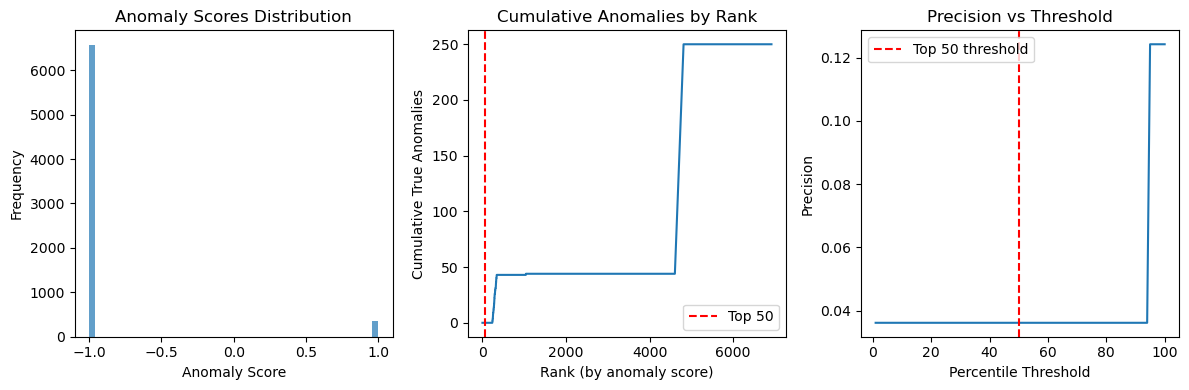

In [49]:
# 训练最终模型并获取异常得分
# 使用最佳配置训练最终模型
from sklearn.metrics import precision_score


best_config = best_results.iloc[0]
X_fe_final = create_features(X)
X_selected_final, _ = select_features(X_fe_final, y, method=best_config['selection_method'], k=30)
preprocessor_final = RobustScaler()
X_processed_final = preprocessor_final.fit_transform(X_selected_final)
lof_final = LocalOutlierFactor(
    n_neighbors=best_config['n_neighbors'],
    contamination=best_config['contamination'],
    metric=best_config['metric'],
    n_jobs=-1
)
anomaly_scores_lof = -lof_final.fit_predict(X_processed_final)
# 分析异常得分分布
plt.figure(figsize=(12, 4))

# 1. 异常得分分布
plt.subplot(1, 3, 1)
plt.hist(anomaly_scores_lof, bins=50, alpha=0.7)
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Anomaly Scores Distribution')

# 2. 真实标签在得分排序中的分布
plt.subplot(1, 3, 2)
sorted_indices = np.argsort(-anomaly_scores_lof)  # 从高异常到低异常
cumulative_anomalies = np.cumsum(y.iloc[sorted_indices])
plt.plot(range(len(y)), cumulative_anomalies)
plt.axvline(x=50, color='red', linestyle='--', label='Top 50')
plt.xlabel('Rank (by anomaly score)')
plt.ylabel('Cumulative True Anomalies')
plt.title('Cumulative Anomalies by Rank')
plt.legend()

# 3. 不同阈值下的精度
plt.subplot(1, 3, 3)
thresholds = np.percentile(anomaly_scores_lof, np.arange(100, 0, -1))
precisions = []
for threshold in thresholds:
    predictions = (anomaly_scores_lof >= threshold).astype(int)
    precision = precision_score(y, predictions, zero_division=0)
    precisions.append(precision)
plt.plot(np.arange(100, 0, -1), precisions)
plt.axvline(x=50, color='red', linestyle='--', label='Top 50 threshold')
plt.xlabel('Percentile Threshold')
plt.ylabel('Precision')
plt.title('Precision vs Threshold')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
display(best_results[['feature_strategy', 'selection_method', 'metric', 'n_neighbors', 
                     'contamination', 'PR-AUC', 'ROC-AUC', 'Precision@50']])

In [15]:
from sklearn.metrics import confusion_matrix

# Threshold from contamination (1 - cont quantile)
threshold_lof = float(np.quantile(anomaly_scores_lof, 1.0 - best_cont))
y_pred_lof = (anomaly_scores_lof >= threshold_lof).astype(int)

cm = confusion_matrix(y, y_pred_lof, labels=[0, 1])
cm_df = pd.DataFrame(cm, index=['True_Normal', 'True_Anomaly'], columns=['Pred_Normal', 'Pred_Anomaly'])

print(f'LOF threshold (quantile {1.0 - best_cont:.2f}): {threshold_lof:.4f}')
display(cm_df)


LOF threshold (quantile 0.99): 3.3498


,Pred_Normal,Pred_Anomaly
True_Normal,6614,52
True_Anomaly,232,18


## Step 8: Save LOF anomaly scores

In [16]:
df_lof_scores = pd.DataFrame({
    'anomaly_score_lof': anomaly_scores_lof,
    'Outlier_label': y
})

lof_save_path = 'lof_scores_top_features.csv'
df_lof_scores.to_csv(lof_save_path, index=False)
print(f'LOF scores saved to: {lof_save_path}')


LOF scores saved to: lof_scores_top_features.csv


## Step 9: PCA 2D visualization of LOF anomaly scores

Shape of LOF PCA embedding: (6916, 2)
Figure saved to: lof_pca_topK.png


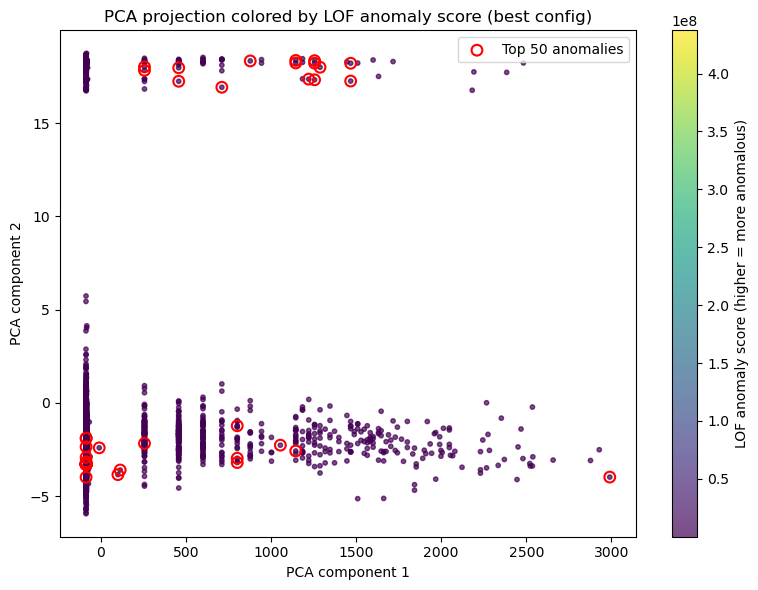

In [17]:
from sklearn.decomposition import PCA

K = 50  # top anomalies to highlight
pca_lof = PCA(n_components=2, random_state=42)
X_lof_pca = pca_lof.fit_transform(X_top_scaled_lof)
print('Shape of LOF PCA embedding:', X_lof_pca.shape)

topK_idx_lof = np.argsort(-anomaly_scores_lof)[:K]

plt.figure(figsize=(8, 6))
sc = plt.scatter(
    X_lof_pca[:, 0],
    X_lof_pca[:, 1],
    c=anomaly_scores_lof,
    s=10,
    alpha=0.7
)

plt.scatter(
    X_lof_pca[topK_idx_lof, 0],
    X_lof_pca[topK_idx_lof, 1],
    facecolors='none',
    edgecolors='red',
    s=60,
    linewidths=1.5,
    label=f'Top {K} anomalies'
)

plt.colorbar(sc, label='LOF anomaly score (higher = more anomalous)')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.title('PCA projection colored by LOF anomaly score (best config)')
plt.legend()
plt.tight_layout()

lof_fig_path = 'lof_pca_topK.png'
plt.savefig(lof_fig_path, dpi=300)
print(f'Figure saved to: {lof_fig_path}')

plt.show()
